In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import xarray as xr
import numpy as np

In [3]:
ds = xr.open_dataset('data/hgt.1977.nc')


In [4]:
ds

<xarray.Dataset>
Dimensions:  (level: 17, lat: 73, lon: 144, time: 1460)
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1977-01-01 ... 1977-12-31T18:00:00
Data variables:
    hgt      (time, level, lat, lon) float32 ...
Attributes:
    Conventions:    COARDS
    title:          4x daily NMC Reanalysis (1977)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    history:        created 95/02/06 by Hoop (netCDF2.3)\nConverted to chunke...
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [5]:
recent_an = ds.sel(time='1977-01-11T00:00:00')

In [6]:
recent_an = recent_an.sel(level=500)

In [6]:
recent_an

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144)
Coordinates:
    level    float32 500.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    time     datetime64[ns] 1977-01-11
Data variables:
    hgt      (lat, lon) float32 ...
Attributes:
    Conventions:    COARDS
    title:          4x daily NMC Reanalysis (1977)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    history:        created 95/02/06 by Hoop (netCDF2.3)\nConverted to chunke...
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

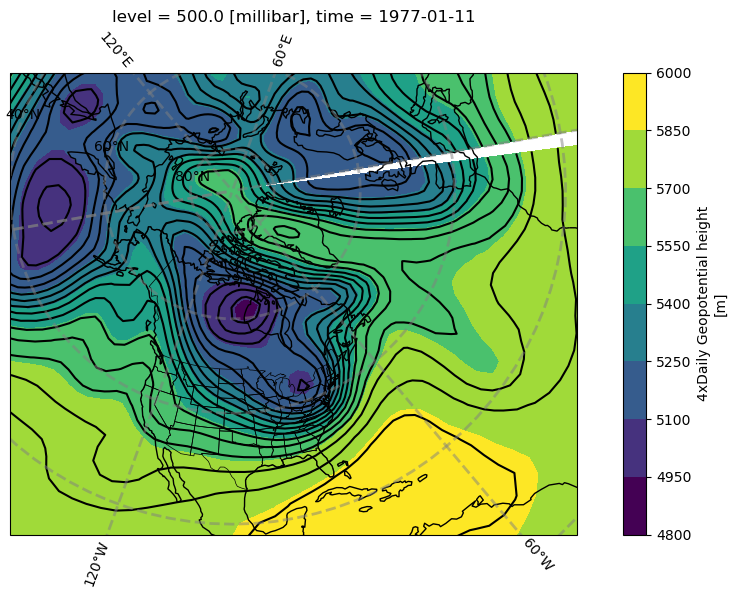

In [23]:
#cartopy.crs.Mercator
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=-100))
#ax.set_global()

a=recent_an['hgt'].plot.contourf(ax=ax, transform=ccrs.PlateCarree(),levels=8)
b=recent_an['hgt'].plot.contour(ax=ax, transform=ccrs.PlateCarree(),colors="black",levels=np.arange(4900,5900,60))

gl = ax.gridlines(draw_labels=True,linewidth=2,color='gray',alpha=0.5,linestyle='--')
ax.coastlines()
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.5)
lonW = -140
lonE = 10
latS = 18
latN = 90
ax.set_extent((lonW, lonE, latS, latN),ccrs.PlateCarree())

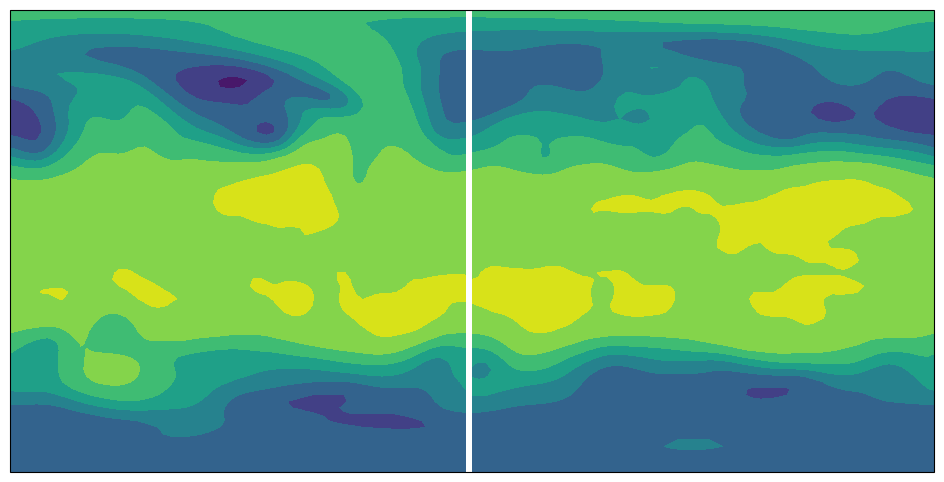

In [7]:
crs = ccrs.PlateCarree()

#lon_2d, lat_2d = np.meshgrid(recent_an['longitude'], recent_an['latitude'])

plt.figure(figsize=(12, 6))
plt.axes(projection=crs)
plt.contourf(recent_an['lon'],recent_an['lat'],recent_an['hgt'])


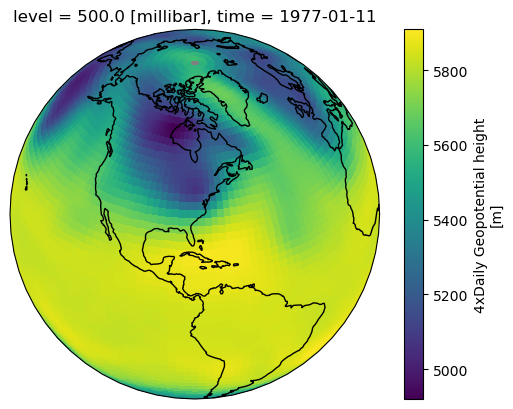

In [8]:
#p = recent_an['hgt'].plot(subplot_kws=dict(projection=ccrs.Orthographic(-80, 35), facecolor="gray"),transform=ccrs.PlateCarree(),)
p = recent_an['hgt'].plot(subplot_kws=dict(projection=ccrs.Orthographic(-80, 35), facecolor="gray"),transform=ccrs.PlateCarree(),)
p.axes.set_global()
p.axes.coastlines()

In [10]:
mi, ma = np.floor(np.nanmin(recent_an['hgt'])), np.ceil(np.nanmax(recent_an['hgt']))
print(mi,ma)
mi=5100
ma=5820
step = 10
levels = np.arange(10*(mi//10), ma+step, step)
lws = [0.5 if level % 10 else 1 for level in levels]


4920.0 5909.0


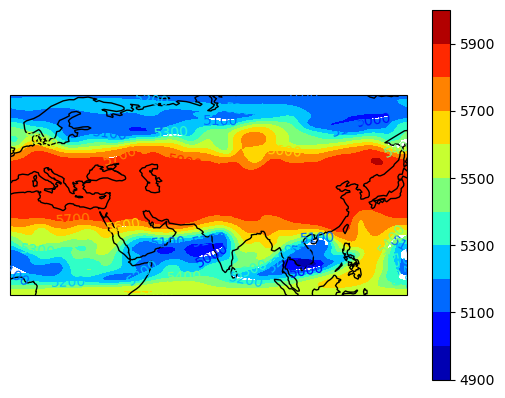

In [11]:

fig = plt.figure()
ax = plt.subplot(projection=ccrs.PlateCarree())
cs = ax.contourf(recent_an['hgt'], cmap='jet',levels=9)
ax.clabel(cs, fmt='%d')
ax.coastlines()
fig.colorbar(cs, ax=ax)
plt.show()

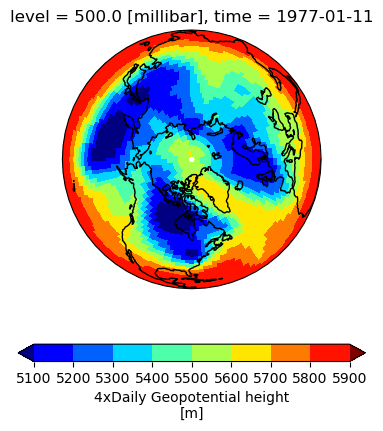

In [12]:
# Fix extent
minval = 5100
maxval = 5900

fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Orthographic(-80, 90)))
recent_an['hgt'].plot(
    ax=axis,
    transform=ccrs.PlateCarree(),  # this is important!
    # usual xarray stuff
    cmap='jet',
    vmin=minval, vmax=maxval,
    levels=9,
    cbar_kwargs={"orientation": "horizontal", "shrink": 0.7},
    robust=True,
)
axis.coastlines()  # cartopy function

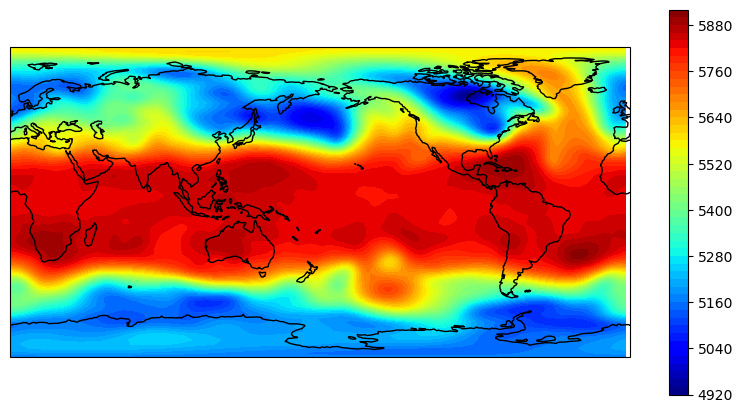

In [13]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=180))

lon = recent_an['hgt'].lon
lat = recent_an['hgt'].lat

plt.contourf(lon,lat,recent_an['hgt'], 60,
            transform=ccrs.PlateCarree(),
            cmap='jet')
ax.coastlines()
ax.set_global()

# Add a color bar
plt.colorbar(ax=ax)
plt.show()

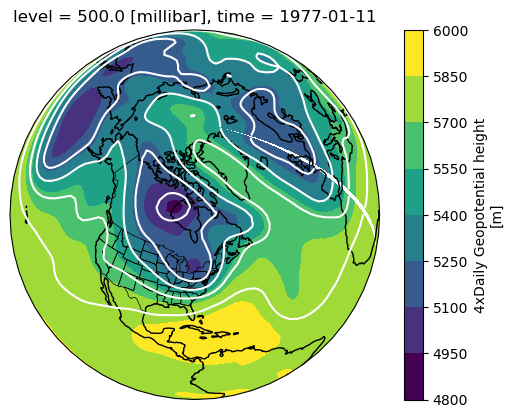

In [14]:
ax = plt.axes(projection=ccrs.Orthographic(-80, 60))
ax.set_global()
a=recent_an['hgt'].plot.contourf(ax=ax, transform=ccrs.PlateCarree(),levels=8)
b=recent_an['hgt'].plot.contour(ax=ax, transform=ccrs.PlateCarree(),colors="white")
ax.coastlines()
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.5)


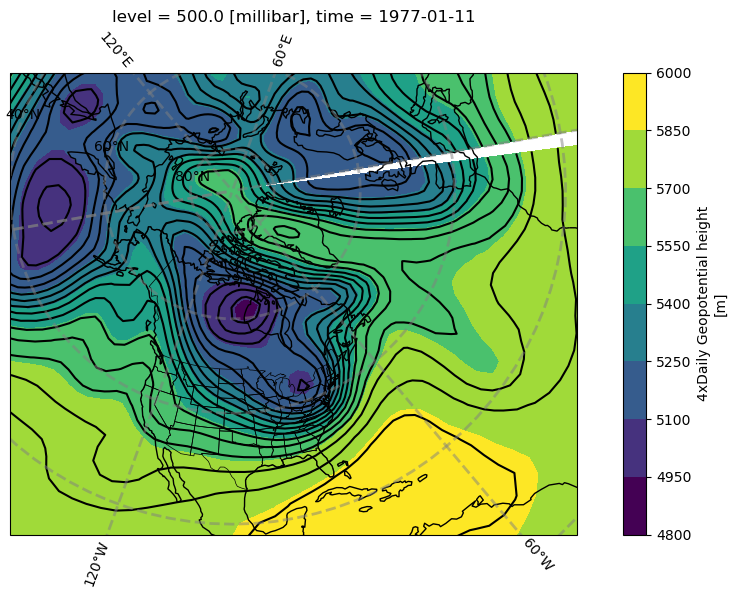

tropical tidbits like projection

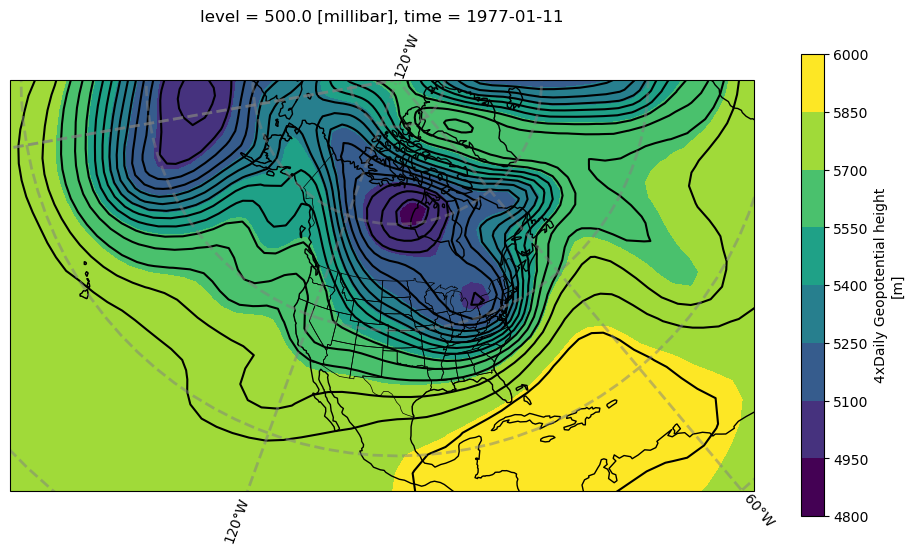

In [16]:
#cartopy.crs.Mercator
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=-100))
#ax.set_global()

a=recent_an['hgt'].plot.contourf(ax=ax, transform=ccrs.PlateCarree(),levels=8)
b=recent_an['hgt'].plot.contour(ax=ax, transform=ccrs.PlateCarree(),colors="black",levels=np.arange(4900,5900,60))

gl = ax.gridlines(draw_labels=True,linewidth=2,color='gray',alpha=0.5,linestyle='--')
ax.coastlines()
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.5)
lonW = -170
lonE = -40
latS = 15
latN = 90
ax.set_extent((lonW, lonE, latS, latN),ccrs.PlateCarree())